In [5]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Assignment 7&8.ipynb',
 'Assignment1.ipynb',
 'auto-mpg (1).data',
 'auto-mpg.data',
 'Bayes.ipynb',
 'BDheerajChandan_25017_Statistics.zip',
 'BEML.csv',
 'bollywoodmovies.csv',
 'breakups.csv',
 'FinalRev.ipynb',
 'GLAXO.csv',
 'healthdrink.xlsx',
 'IPL IMB381IPL2013.csv',
 'mango.csv',
 'Matplotlib.ipynb',
 'MBA Salary.csv',
 'NewGlaxo.csv',
 'onestop.csv',
 'passport.csv',
 'revision.ipynb',
 'revision.txt',
 'Statisctics_Notes.txt']

# Z test

In [8]:
import pandas as pd
from scipy import stats
import math
data=pd.read_csv('passport.csv')
def z(pop_mean,pop_std,sample):
    z_score=(sample.mean()-pop_mean)/(pop_std/math.sqrt(len(sample)))
    return z_score,stats.norm.cdf(z_score)
z(30,12.5,data["processing_time"])

(-1.4925950555994747, 0.06777160919961511)

# T Test (1 Sample)

In [11]:
import pandas as pd
from scipy import stats
data=pd.read_csv("bollywoodmovies.csv")
stats.ttest_1samp(data["production_cost"],500)

TtestResult(statistic=-2.2845532872667547, pvalue=0.027862556406761777, df=39)

# T Test (2 Sample)

In [14]:
import pandas as pd
from scipy import stats
data=pd.read_excel("healthdrink.xlsx",sheet_name=["healthdrink_yes","healthdrink_no"])
stats.ttest_ind(data["healthdrink_yes"],data["healthdrink_no"])

Ttest_indResult(statistic=array([8.13167507]), pvalue=array([1.19769859e-13]))

# T Test (Paired Sample)

In [16]:
import pandas as pd
from scipy import stats
data=pd.read_csv("breakups.csv")
stats.ttest_rel(data["Before_Breakup"],data["After_Breakup"])

TtestResult(statistic=-0.5375404241815106, pvalue=0.5971346738292477, df=19)

# ANOVA

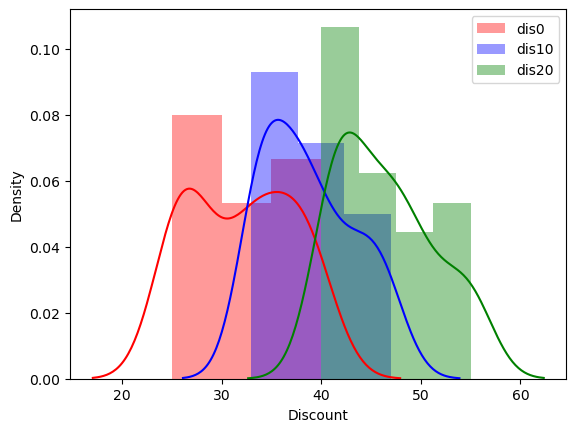

In [32]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv("onestop.csv")
f_oneway(data["discount_0"],data["discount_10"],data["discount_20"])
sns.distplot(data["discount_0"],color='red',label='dis0')
sns.distplot(data["discount_10"],color='blue',label='dis10')
sns.distplot(data["discount_20"],color='green',label='dis20')
plt.xlabel("Discount")
plt.ylabel("Density")
plt.legend()
plt.show()

# Chi Square

Power_divergenceResult(statistic=213.66071428571428, pvalue=4.709625210089497e-46)


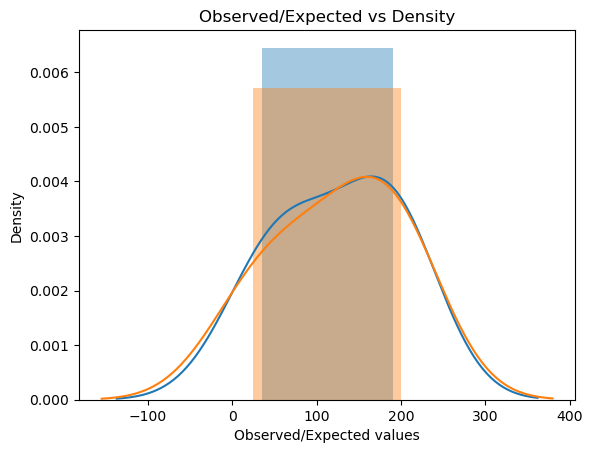

In [42]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
l1=[190,185,35,90]
s=sum(l1)
l2=[(s*0.35),(s*0.4),(s*0.2),(s*0.05)]
print(stats.chisquare(l1,l2))
sns.distplot(l1)
sns.distplot(l2)
'''
plt.hist(l1,alpha=0.5)
plt.hist(l2,alpha=0.5)'''
plt.xlabel("Observed/Expected values")
plt.ylabel("Density")
plt.title("Observed/Expected vs Density")
plt.show()

# ETL
Extraction - read csv
Transform - Date time  to index
Load - To csv


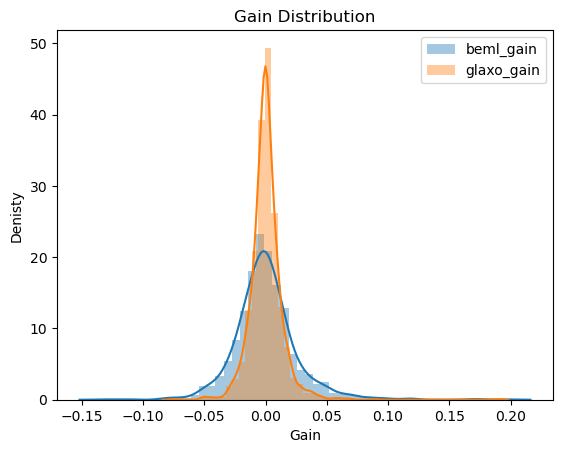

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
beml_data=pd.read_csv("beml.csv")
beml_data=beml_data.set_index(pd.DatetimeIndex(beml_data["Date"]))
glaxo_data=pd.read_csv("glaxo.csv")
glaxo_data=glaxo_data.set_index(pd.DatetimeIndex(glaxo_data["Date"]))
beml_data["Gain"]=beml_data["Close"].pct_change(periods=1)
glaxo_data["Gain"]=glaxo_data["Close"].pct_change(periods=1)

# Gain vs Density
sns.distplot(beml_data["Gain"],label="beml_gain")
sns.distplot(glaxo_data["Gain"],label="glaxo_gain")
plt.xlabel("Gain")
plt.ylabel("Denisty")
plt.title("Gain Distribution")
plt.legend()
plt.show()

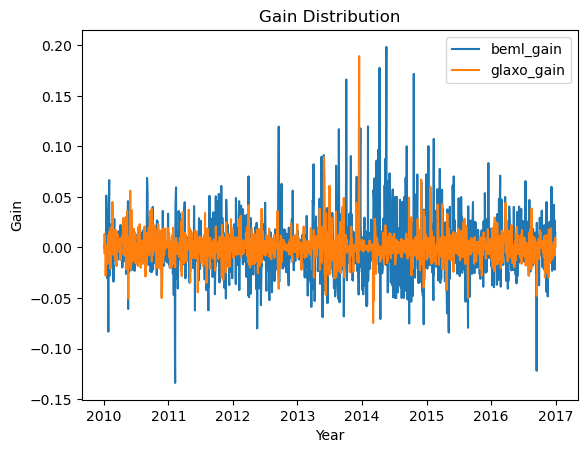

In [69]:
# Gain vs Year
plt.plot(beml_data["Gain"],label="beml_gain")
plt.plot(glaxo_data["Gain"],label="glaxo_gain")
plt.xlabel("Year")
plt.ylabel("Gain")
plt.title("Gain Distribution")
plt.legend()
plt.show()

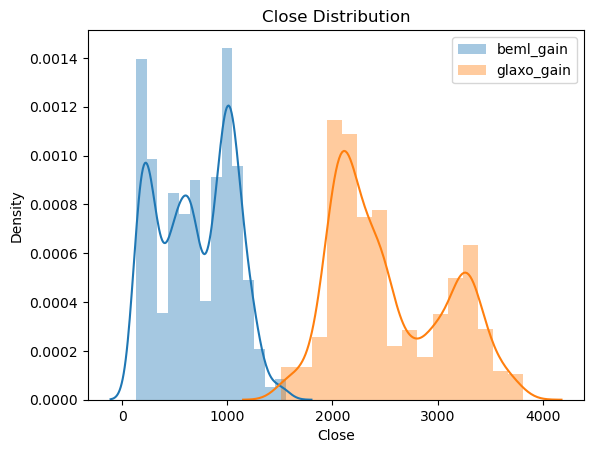

In [70]:
# Close vs Density
sns.distplot(beml_data["Close"],label="beml_gain")
sns.distplot(glaxo_data["Close"],label="glaxo_gain")
plt.xlabel("Close")
plt.ylabel("Density")
plt.title("Close Distribution")
plt.legend()
plt.show()

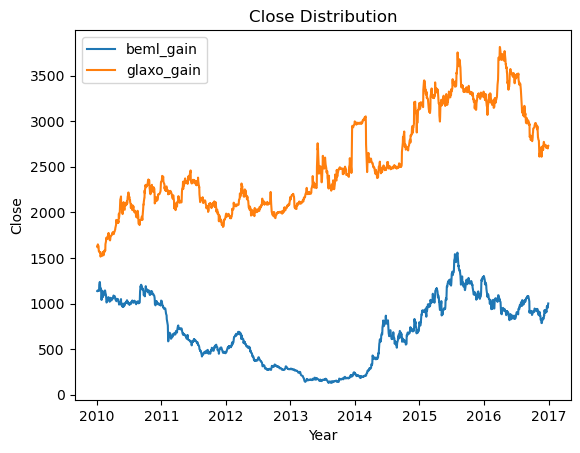

In [71]:
# Close vs Year
plt.plot(beml_data["Close"],label="beml_gain")
plt.plot(glaxo_data["Close"],label="glaxo_gain")
plt.xlabel("Year")
plt.ylabel("Close")
plt.title("Close Distribution")
plt.legend()
plt.show()

In [77]:
beml_data.to_csv("new beml.csv")
glaxo_data.to_csv("new glaxo.csv")
pd.read_csv("new beml.csv").head()

,Date,Date.1,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Gain
0,2010-01-04,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18,NaN
1,2010-01-05,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47,-0.000881
2,2010-01-06,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84,0.004407
3,2010-01-07,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98,0.003993
4,2010-01-08,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42,-0.000087


In [78]:
pd.read_csv("new glaxo.csv").head()

,Date,Date.1,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Gain
0,2010-01-04,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74,NaN
1,2010-01-05,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58,-0.005444
2,2010-01-06,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09,0.013422
3,2010-01-07,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00,0.006225
4,2010-01-08,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11,-0.005398


In [ ]:
'''
Hypothesis testing 
- It is an example of infrential statistics
- It is a claim]
- The test is to retain or reject Null Hypothesis.
- It has two complementary statements : Null and Alternate hypothesis
- Null Hypothesis is an existing belief. Alternate hypothesis is intended to establish a new evidence.
- Two types of testing : Parametric and Non Parametric
- Parametric : It uses population parameters like mean, SD for calculation of Ztest, Ttest(1sample, 2Sample, Paired Sample)
               ANOVA
- Non Parametrics : It uses data form comment on claim.
- Steps :   1. Define Null and Alternate Hypothesis. Hypothesis is described by population parameters.
            2. Identify the test statistics for Null hypothesis
            3. Deteremine the criteria for validating the Null hypothesis
            4. Find/Calculate the P-Value(conditional probability) which is observed to test statistics where 
               Null Hypothesis is True.
            5. Decide whether claim has to retain or reject
            If P-value is greater than give alpha=0.5 then Null Hypothesis is accepted/retained and 
            Alternate Hypothesis is rejected.

'''